In [7]:
#importing libraries
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

In [8]:
#reading the data
data=pd.read_csv("/content/monthly-milk-production-pounds.csv")

In [9]:
print("shape =",data.shape)
print('\n')
data.head()
# dataset contain monthly milk production from 1962 to 1975(in pounds)

shape = (169, 2)




,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [10]:
data.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [11]:
# since it contain unwanted we just drop it.
data.drop(168,axis=0,inplace=True)

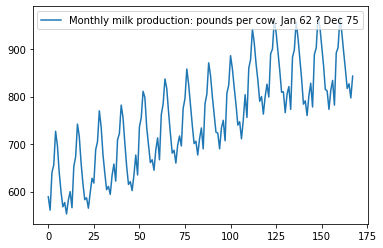

In [12]:
data.plot()
# from the plot we can understand that it is seasonable type of data

In [14]:
data.columns=["ds","y"] # converting coulmn names to specified format accepted by fbprophet
data['ds']=pd.to_datetime(data['ds'])# converting date coulmn to date object

In [15]:
from fbprophet import Prophet

In [16]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [18]:
model=Prophet() #initialize the model
model.fit(data) # fitting on the data

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* since data is monthly, weekly and yearly seasonality is disabled by prohet automatically

In [19]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [20]:
future_dates=model.make_future_dataframe(periods=365)# making future dates for predicting

In [22]:
prediction=model.predict(future_dates)

In [23]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.941323,576.821225,596.592152,606.941323,606.941323,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,0.0,0.0,0.0,586.789525
1,1962-02-01,608.656256,536.558236,556.262642,608.656256,608.656256,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,0.0,0.0,0.0,546.067637
2,1962-03-01,610.205228,631.543118,651.132880,610.205228,610.205228,31.365739,31.365739,31.365739,31.365739,31.365739,31.365739,0.0,0.0,0.0,641.570967
3,1962-04-01,611.920161,649.647507,668.527149,611.920161,611.920161,46.703773,46.703773,46.703773,46.703773,46.703773,46.703773,0.0,0.0,0.0,658.623935
4,1962-05-01,613.579774,711.583298,731.631900,613.579774,613.579774,108.040207,108.040207,108.040207,108.040207,108.040207,108.040207,0.0,0.0,0.0,721.619981


In [25]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.347638,803.480447,826.475821
529,1976-11-27,818.479106,807.355607,830.253277
530,1976-11-28,821.790064,810.278585,833.746527
531,1976-11-29,825.219679,814.570154,837.028238
532,1976-11-30,828.699914,817.530937,839.931481


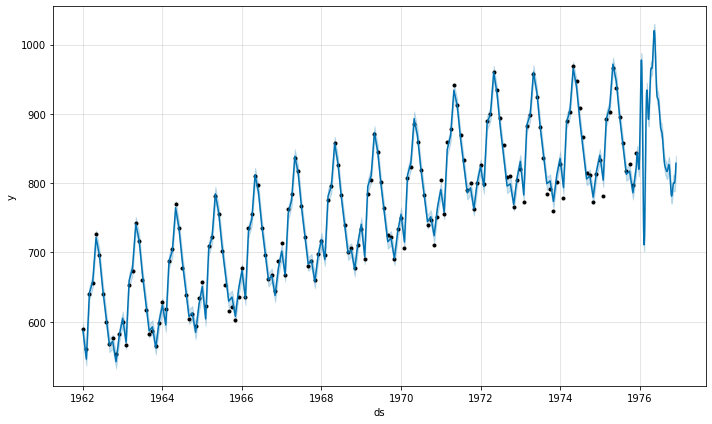

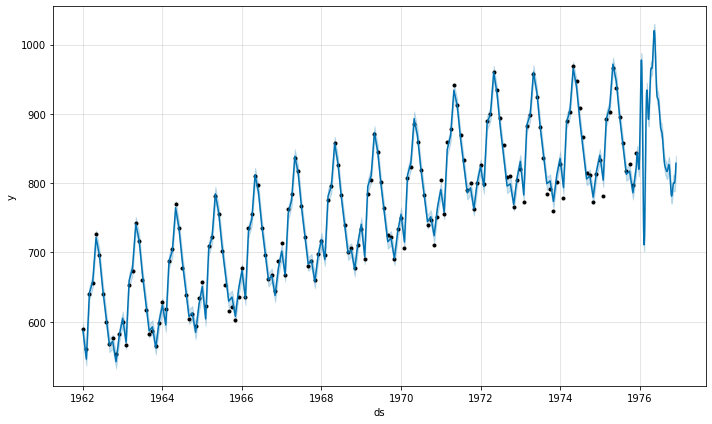

In [26]:
model.plot(prediction) #plotting the prediction

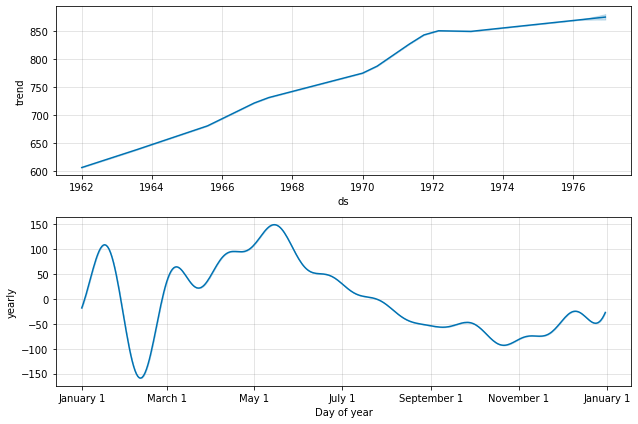

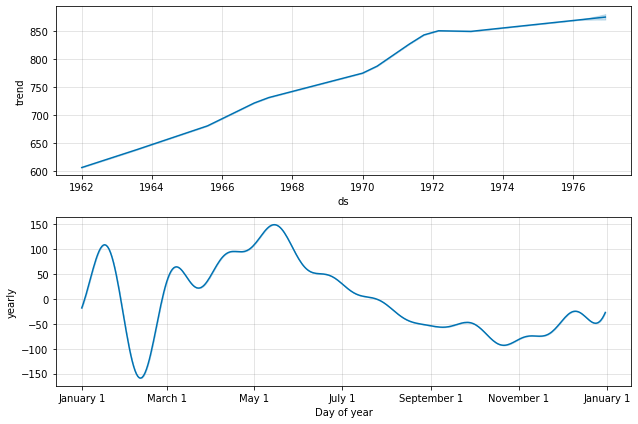

In [27]:
model.plot_components(prediction)


### Cross Validation

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

    horizon the forecast horizon
    initial the size of the initial training period
    period the spacing between cutoff dates



In [29]:
from fbprophet.diagnostics import cross_validation

In [30]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [31]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,630.734519,628.746376,632.590522,622.0,1965-01-22
1,1965-03-01,715.209269,708.782380,721.392246,709.0,1965-01-22
2,1965-04-01,738.046179,724.562641,750.716256,722.0,1965-01-22
3,1965-05-01,809.508773,788.733579,830.198035,782.0,1965-01-22
4,1965-06-01,778.278652,748.256573,808.017416,756.0,1965-01-22



### Obtaining the Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [32]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,255.110328,15.972174,12.522709,0.016138,0.014043,0.36
1,41 days,253.085086,15.908648,12.440669,0.016069,0.014043,0.36
2,42 days,267.466632,16.354407,12.890051,0.016696,0.014071,0.36
3,43 days,267.960409,16.369496,13.005926,0.016878,0.014071,0.36
4,46 days,252.637615,15.894578,12.615442,0.016331,0.014071,0.36


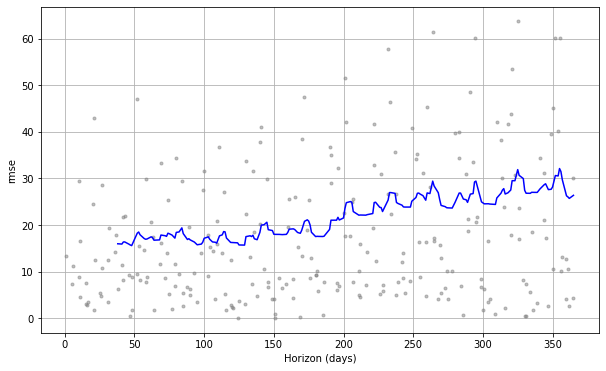

In [33]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')